# Projeto de Teste A/B de loja online

## Objetivo do projeto

Avaliar os resultados de um **teste A/B** que comparou um novo sistema de recomendação (grupo B) com o modelo atual (grupo A), medindo se houve ao menos **10% de aumento nas conversões** de **visualização de produto, adição ao carrinho** e **compras**, dentro de **14 dias** após o cadastro.

## Pré-Processamento dos Dados

In [1]:
# importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

### Marketig events

In [2]:
# carregar e visualizar os dados
marketing_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
display(marketing_events.info())
display(marketing_events.head(10))
display(marketing_events.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


None

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


0

In [3]:
# Converter os dados aos tipos apropridos
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])
marketing_events.info()

marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


### New users

In [4]:
# carregar e visualizar os dados
new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
display(new_users.info())
display(new_users.head(10))
display(new_users.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


None

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
5,137119F5A9E69421,2020-12-07,N.America,iPhone
6,62F0C741CC42D0CC,2020-12-07,APAC,iPhone
7,8942E64218C9A1ED,2020-12-07,EU,PC
8,499AFACF904BBAE3,2020-12-07,N.America,iPhone
9,FFCEA1179C253104,2020-12-07,EU,Android


0

In [5]:
# Converter os dados aos tipos apropridos
new_users['first_date'] = pd.to_datetime(new_users['first_date'])
new_users['region'] = new_users['region'].astype('category')
new_users['device'] = new_users['device'].astype('category')

new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  category      
 3   device      58703 non-null  category      
dtypes: category(2), datetime64[ns](1), object(1)
memory usage: 1.0+ MB


### Events

In [6]:
# carregar e visualizar os dados
events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
display(events.info())
display(events.head(10))
display(events.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


None

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99
6,6B2F726BFD5F8220,2020-12-07 11:27:42,purchase,4.99
7,BEB37715AACF53B0,2020-12-07 04:26:15,purchase,4.99
8,B5FA27F582227197,2020-12-07 01:46:37,purchase,4.99
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99


0

In [7]:
# Converter os dados aos tipos apropridos
events['event_dt'] = pd.to_datetime(events['event_dt'])
events['event_name'] = events['event_name'].astype('category')
events['details'] = events['details'].astype('category')

events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  category      
 3   details     60314 non-null   category      
dtypes: category(2), datetime64[ns](1), object(1)
memory usage: 7.3+ MB


**Nota:** A coluna `details` contém valores apenas para eventos de compra (`purchase`). Como o objetivo da análise é avaliar a taxa de conversão em cada etapa do funil, os valores ausentes nessa coluna não impactam os resultados e não serão tratados.

### Participants

In [8]:
# carregar e visualizar os dados
participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')
display(participants.info())
display(participants.head(10))
display(participants.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


None

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
5,7473E0943673C09E,A,recommender_system_test
6,C46FE336D240A054,A,recommender_system_test
7,92CB588012C10D3D,A,recommender_system_test
8,B3A2485649E4A012,A,recommender_system_test
9,66FC298441D50783,A,recommender_system_test


0

In [9]:
# Converter os dados aos tipos apropridos
participants['ab_test'] = participants['ab_test'].astype('category')
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   user_id  14525 non-null  object  
 1   group    14525 non-null  object  
 2   ab_test  14525 non-null  category
dtypes: category(1), object(2)
memory usage: 241.4+ KB


## Análise exploratória de dados

### Estudar a conversão em diferentes etapas do funil:

In [10]:
# juntar os dataframes
df = events.merge(participants, on='user_id')
df = df.merge(new_users, on='user_id')

# Filtrar eventos dentro de 14 dias após o cadastro
df = df[df['event_dt'] <= df['first_date'] + pd.Timedelta(days=14)]
df = df.reset_index()

In [11]:
# Contagem de usuários únicos por grupo e tipo de evento
funnel_counts = df.groupby(['group', 'event_name'])['user_id'].nunique().unstack()

# Garantir que a ordem dos eventos siga o funil
funnel_counts = funnel_counts[['login','product_page', 'product_cart', 'purchase']]

# Calcular taxas de conversão entre etapas
conversion_rates = funnel_counts.div(funnel_counts['login'], axis=0)

# Exibir resultados
print('Contagem de eventos por etapa:')
display(funnel_counts)
print('Conversão por etapa:')
display(conversion_rates)

Contagem de eventos por etapa:


event_name,login,product_page,product_cart,purchase
group,,,,
A,7872,5207,2483,2682
B,6203,3985,2037,2008


Conversão por etapa:


event_name,login,product_page,product_cart,purchase
group,,,,
A,1.0,0.661458,0.315422,0.340701
B,1.0,0.642431,0.328389,0.323714


- As taxas de coversão por etapa não se divergem muito, com uma taxa de conversão ligeiramente superior no grupo A.

**Nota:** Em ambos os grupos a conversão de compras (`purchase`) está acima do esperado em relação a etapa de adicionar ao carrinho (`product_cart`). Uma possível explicação é que o sistema permite compra direta sem adicionar ao carrinho.

### Distribuição do número de eventos por usuários

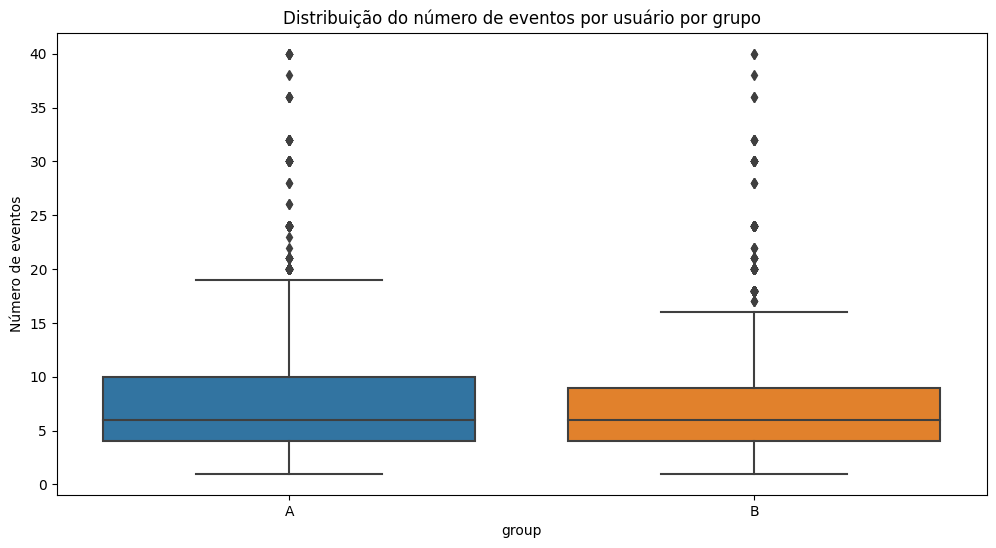

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,8213.0,7.756605,4.914546,1.0,4.0,6.0,10.0,40.0
B,6310.0,7.306181,4.592137,1.0,4.0,6.0,9.0,40.0


In [12]:
# 1. Contar eventos por usuário
events_per_user = df.groupby('user_id').size().reset_index(name='events_count')

# 2. Juntar com o grupo
events_per_user = events_per_user.merge(participants[['user_id', 'group']], on='user_id')

# 3. Ver quantos eventos cada usuário fez por grupo
plt.figure(figsize=(12,6))
sns.boxplot(x='group', y='events_count', data=events_per_user)
plt.title('Distribuição do número de eventos por usuário por grupo')
plt.ylabel('Número de eventos')
plt.show()

# 4. Estatística descritiva para cada grupo
display(events_per_user.groupby('group')['events_count'].describe())


- O numero de eventos por usuários é distribuído de forma bem próxima entre as amostras de controle e de teste.

### Os usuários de ambas as amostras estão presentes?

In [13]:
# Usuários participantes por grupo
participants_per_group = participants.groupby('group')['user_id'].nunique()

# Usuários com eventos registrados por grupo
users_with_events = (
    events[['user_id']]
    .merge(participants[['user_id', 'group']], on='user_id')
    .groupby('group')['user_id']
    .nunique()
)

print('Usuários participantes por grupo:')
print(participants_per_group)
print('\nUsuários com eventos registrados por grupo:')
print(users_with_events)

Usuários participantes por grupo:
group
A    7874
B    6205
Name: user_id, dtype: int64

Usuários com eventos registrados por grupo:
group
A    7874
B    6205
Name: user_id, dtype: int64


✅ Podemos confirmar que todos os usuários de ambas as amostras estão presentes

### Como o número de eventos é distribuído entre os dias?

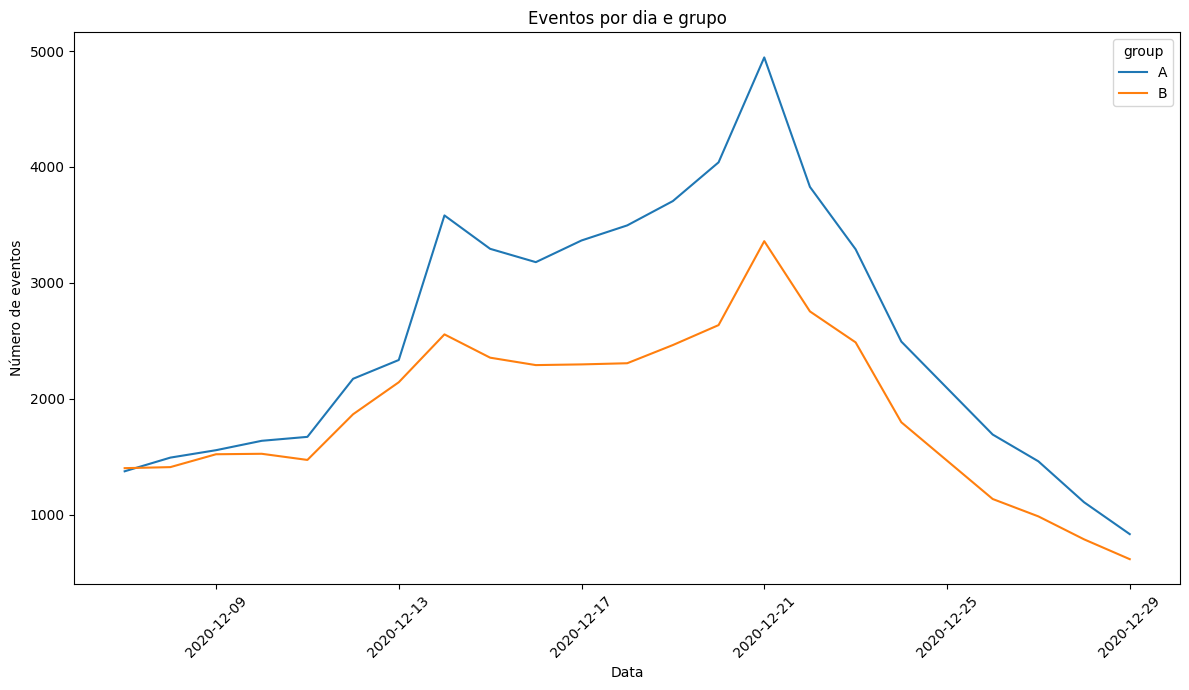

In [14]:
# Contagem de eventos por dia e grupo
events_by_day_group = df.groupby([df['event_dt'].dt.date, 'group'])['event_dt'].count().unstack()

# Plot
events_by_day_group.plot(figsize=(12, 7))
plt.title('Eventos por dia e grupo')
plt.xlabel('Data')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Os dois grupos seguem padrões semelhantes ao longo do tempo, com pico de eventos em 21/12 e queda nos dias seguintes, possivelmente por causa do período natalino. O grupo A tem mais eventos por dia, o que reflete seu maior número de usuários. Como as curvas são parecidas, não há indício de viés temporal relevante entre os grupos.

### Existem quaisquer particularidades nos dados que devemos considerar antes de começar o teste A/B?

In [15]:
# Número de usuários por grupo
df.groupby('group')['user_id'].nunique()

group
A    7873
B    6204
Name: user_id, dtype: int64

✅ Número de usuários por grupo é razoável para o teste, com um numero levemente maior no grupo A, mas nada que invalide o teste.

In [16]:
# Datas de começo e término por grupo
df.groupby('group')['event_dt'].agg(['min', 'max'])

,min,max
group,,
A,2020-12-07 00:02:48,2020-12-29 23:38:29
B,2020-12-07 00:03:51,2020-12-29 23:54:58


 ✅ Os grupos A e B cobrem o mesmo intervalo de datas

In [17]:
# Verificar se há usuários que aparecem nos dois grupos
users_a = set(df[df['group'] == 'A']['user_id'].unique())
users_b = set(df[df['group'] == 'B']['user_id'].unique())
overlap = users_a & users_b
len(overlap)

441

❌ Temos 441 usuários que apareceram em ambos os grupos, o que viola o princípio de aleatorização e independência entre grupos em um teste A/B.

In [18]:
# Filtrar o DataFrame removendo os usuários duplicados
df_clean = df[~df['user_id'].isin(overlap)]

## Avaliar os resultados do teste A/B

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93525 entries, 0 to 98732
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       93525 non-null  int64         
 1   user_id     93525 non-null  object        
 2   event_dt    93525 non-null  datetime64[ns]
 3   event_name  93525 non-null  category      
 4   details     13591 non-null  category      
 5   group       93525 non-null  object        
 6   ab_test     93525 non-null  category      
 7   first_date  93525 non-null  datetime64[ns]
 8   region      93525 non-null  category      
 9   device      93525 non-null  category      
dtypes: category(5), datetime64[ns](2), int64(1), object(2)
memory usage: 4.7+ MB


## Teste de hipótese - Conversão final (A vs B)

Definição das hipóteses:

- Hipótese nula (H₀): As taxas de conversão dos grupos A e B são iguais.

- Hipótese alternativa (H₁): As taxas de conversão dos grupos A e B são diferentes.

In [20]:
# Agrupar por usuário e marcar se houve compra
purchase_flag = df_clean[df_clean['event_name'] == 'purchase'].groupby('user_id').size()
df_users = df_clean[['user_id', 'group']].drop_duplicates()
df_users['purchased'] = df_users['user_id'].isin(purchase_flag.index).astype(int)

# Separar por grupo
group_counts = df_users.groupby('group')['purchased'].agg(['sum', 'count'])
group_counts['conversion'] = group_counts['sum']/group_counts['count']
display(group_counts)

# Preparar dados para o teste
successes = group_counts['sum'].values
n_obs = group_counts['count'].values

,sum,count,conversion
group,,,
A,2555,7432,0.343784
B,1881,5763,0.326393


In [21]:
# Realizar o z-teste para proporções
z_stat, p_value = proportions_ztest(successes, n_obs)

# Exibir resultados
print('Valor-p:', p_value)

# Interpretar o resultado
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

Valor-p: 0.03595584299024583
Rejeitamos a hipótese nula


Utilizando um teste z para comparação de proporções, obtivemos:

- Valor-p ≈ 0.036

Como o valor-p é menor que o nível de significância de 5% (α = 0.05), **rejeitamos a hipótese nula**.

**Conclusão:** A diferença nas taxas de conversão entre os grupos A e B é **estatisticamente significativa**.

## Conlusão

### 📊 Análise Exploratória de Dados (AED)

Durante a etapa de Análise Exploratória de Dados, investigamos o comportamento dos usuários de e-commerce com base em eventos como **visualizações de produto**, **adição ao carrinho** e **compras realizadas**, segmentados por grupos de teste (A e B).

- Observamos que o **grupo A** teve uma taxa de conversão geral **ligeiramente superior** à do grupo B na maioria dos estágios do funil.
- A maior diferença entre os grupos ocorreu na **etapa final de compra**, sugerindo que o novo sistema de recomendação (grupo B) **não apresentou melhoria perceptível** no comportamento de conversão.


### 🧪 Teste A/B

Para validar estatisticamente essa observação, realizamos um **teste z para comparação de proporções**, e vimos que a diferença observada nas taxas de conversão entre os grupos A e B é **estatisticamente significativa**. O grupo A converteu mais do que o grupo B, indicando que **a versão antiga do sistema de recomendação apresentou melhor desempenho** durante o período analisado.